### BikeSharing On Demand 
* 자전거 대여수를 예측 - 회귀
1. Data Loading
2. Data Preprocessing
3. Visualization
4. Feature Engineering
5. Model / Training / Prediction
7. Submission

### 1. Data Load

In [127]:
# warning ignore
import warnings

warnings.filterwarnings('ignore')

In [128]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/bike/train.csv', parse_dates=['datetime'])
test = pd.read_csv('data/bike/test.csv', parse_dates=['datetime'])

print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [129]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [130]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [133]:
train['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [134]:
def val_count(colname):
    return train[colname].value_counts().sort_values(ascending=False)

In [135]:
val_count('season')

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [136]:
#holiday 1:휴일
val_count('holiday')

0    10575
1      311
Name: holiday, dtype: int64

In [137]:
#workingday 0:주말, 1:주중
val_count('workingday')

1    7412
0    3474
Name: workingday, dtype: int64

In [138]:
#weather 1:날씨좋음
val_count('weather')

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [139]:
#temperature 
val_count('temp').head(10)

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
Name: temp, dtype: int64

In [140]:
#windspeed
val_count('windspeed')

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [141]:
#count
val_count('count')

5      169
4      149
3      144
6      135
2      132
      ... 
890      1
850      1
842      1
818      1
943      1
Name: count, Length: 822, dtype: int64

In [142]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [143]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


### 2. Data Preprocessing (전처리)
* datetime 컬럼에서 년/월/일/시/분/초/요일 추출해서 새로운 컬럼을 만든다

In [144]:
print(type(train['datetime']))
print(type(train['datetime'].dt))
train['datetime'].dt.year

<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.accessors.DatetimeProperties'>


0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [145]:
train_test_data = [train, test]

for data in train_test_data:
    #년도
    data['datetime-year'] = data['datetime'].dt.year
    #월
    data['datetime-month'] = data['datetime'].dt.month
    #일
    data['datetime-day'] = data['datetime'].dt.day
    #시간
    data['datetime-hour'] = data['datetime'].dt.hour
    #분
    data['datetime-minute'] = data['datetime'].dt.minute
    #초
    data['datetime-second'] = data['datetime'].dt.second
    #요일
    data['datetime-dayofweek'] = data['datetime'].dt.dayofweek
    

print(train.columns)    
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek'],
      dtype='object')


### 3. Visualization (시각화)

In [146]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='season', ylabel='count'>

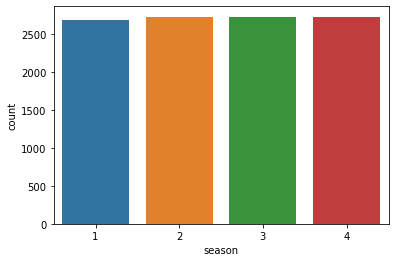

In [147]:
#season
sns.countplot(data=train, x='season')

<AxesSubplot:xlabel='weather', ylabel='count'>

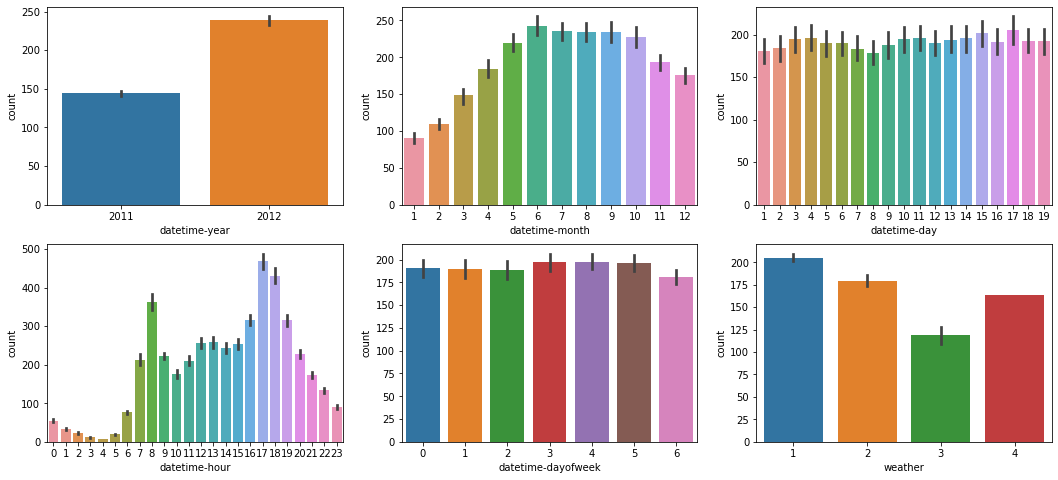

In [148]:
#Figure를 6개의 Axes로 분할
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data=train, x='datetime-day', y='count', ax=ax3)
sns.barplot(data=train, x='datetime-hour', y='count', ax=ax4)
sns.barplot(data=train, x='datetime-dayofweek', y='count', ax=ax5)
sns.barplot(data=train, x='weather', y='count', ax=ax6)

In [149]:
train['datetime-day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [150]:
test['datetime-day'].unique()

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64)

In [151]:
#년도와 월을 합친 datetime-year-month 컬럼을 추가 (훈련데이터에만)
train['datetime-year-month'] = train['datetime-year'].astype('str') + '-' + train['datetime-month'].astype('str')

train[['datetime-year','datetime-month','datetime-year-month']].head()

,datetime-year,datetime-month,datetime-year-month
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1
3,2011,1,2011-1
4,2011,1,2011-1


<AxesSubplot:xlabel='datetime-year-month', ylabel='count'>

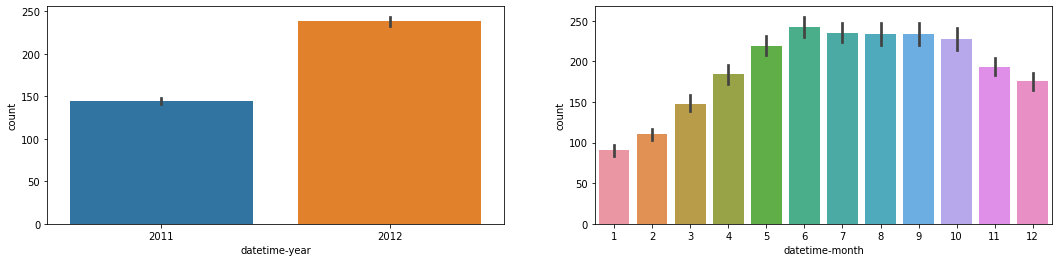

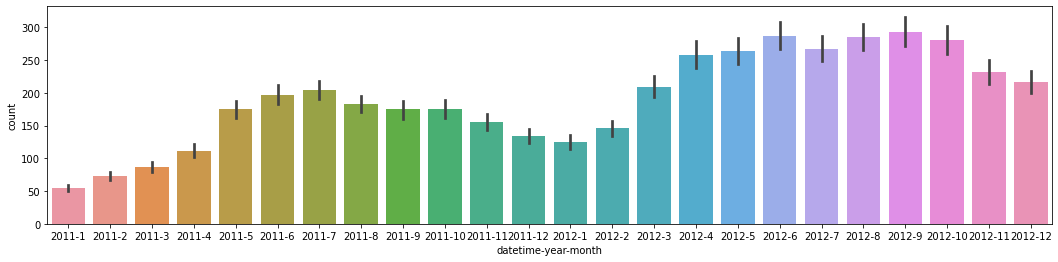

In [152]:
figure,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)
sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)

figure,ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
sns.barplot(data=train, x='datetime-year-month', y='count', ax=ax3)

<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

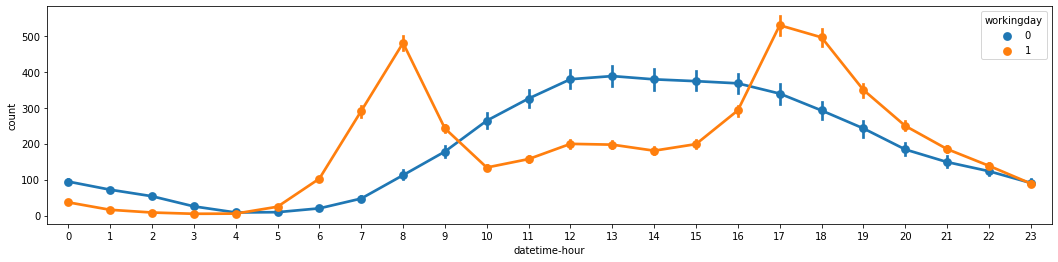

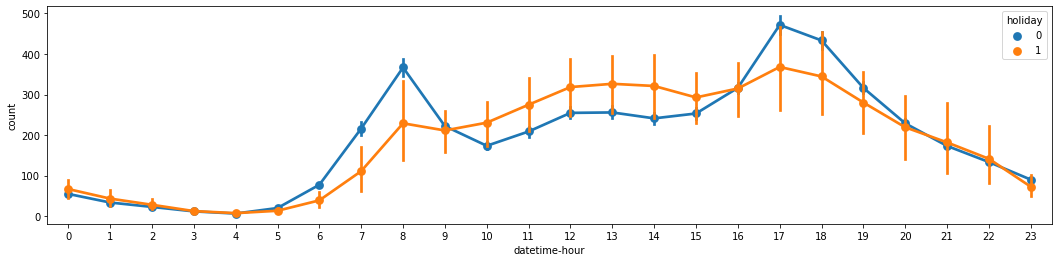

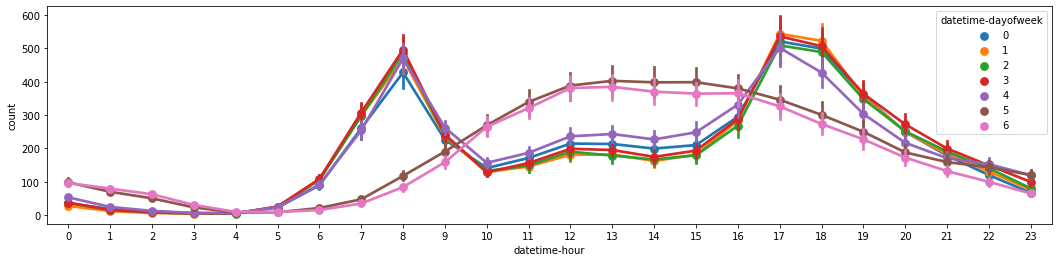

In [153]:
figure,ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='datetime-hour', y='count', hue='workingday', ax=ax1)

figure,ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='datetime-hour', y='count', hue='holiday', ax=ax2)

figure,ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='datetime-hour', y='count', hue='datetime-dayofweek', ax=ax3)


<AxesSubplot:xlabel='temp', ylabel='Density'>

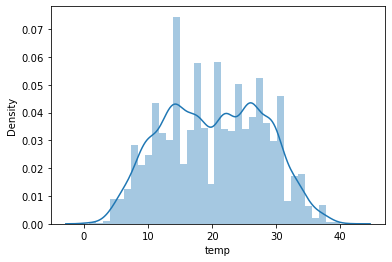

In [154]:
#temperature 분포
sns.distplot(train['temp'], hist=True)

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

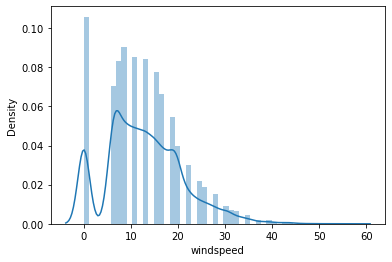

In [155]:
#windspeed 분포
sns.distplot(train['windspeed'], hist=True)

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

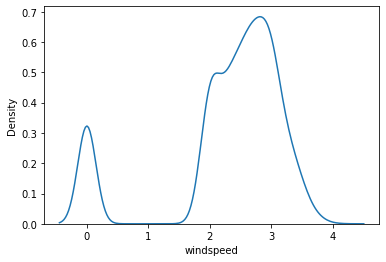

In [156]:
import numpy as np

windspeed_log = np.log1p(train['windspeed'])
sns.distplot(windspeed_log, hist=False)

### 4. Feature Selection 


In [157]:
print(train.columns)
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-year-month'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek'],
      dtype='object')


In [158]:
#month 추가 
feature_names_1st = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed',
                 'datetime-year', 'datetime-month', 'datetime-hour','datetime-dayofweek']

feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed',
                 'datetime-year','datetime-hour','datetime-dayofweek']

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [159]:
#훈련데이터 생성(독립변수)
X_train = train[feature_names]
print(X_train.shape)
X_train.head(3)

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5


In [160]:
#훈련데이터 (종속변수)
label_name = 'count'

y_train = train[label_name]
print(y_train.shape)
y_train.head(3)

(10886,)


0    16
1    40
2    32
Name: count, dtype: int64

In [161]:
#훈련데이터의 종속변수 값의 분포를 균등하기 위해서 log() 함수 
y_train = np.log(y_train + 1)
print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [162]:
#테스트데이터(독립변수)
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


### 5. Model / Training & Prediction
* 앙상블(ensemble) 학습 
 - 여러개의 모델을 결합하여 학습하는 방식
 - Voting / Bagging 방식
     - 보팅과 배깅은 여러개의 분류기가 투표를 통해서 최종 예측결과를 결정하는 방식
     - 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하는 방식
     - 배깅은 서로 같은 알고리즘 기반이며, 샘플링을 서로 다르게 해서 학습하는 방식
 - RandomForestRegressor 사용 
     - 랜덤포레스트는 배깅방식을 사용한다 
     - n_estimators 의 default 100 개의 decision tree를 사용함

In [163]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
#학습하기
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [164]:
#예측하기
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(6493,)


array([2.52498911, 1.70632115, 1.49698713, ..., 4.64825741, 4.57785496,
       3.83879449])

In [165]:
#예측한 결과를 지수함수 exp()로 변환을 해서 제출하기
predictions = np.exp(predictions) - 1
print(predictions.shape)
predictions

(6493,)


array([ 11.49075918,   4.50865861,   3.46820662, ..., 103.40289511,
        96.30544632,  45.46942122])

#### 5.1 제출전에 score 확인
* 선형회귀는 예측값과 실제값(훈련세트에 있는)차이의 평균제곱오차를 최소화 하는 a,b와 를 찾아야 한다
* y = ax + b
* 평균제곱오차(MSE, Mean Squarred Error) - 실제값과 예측값의 차이를 제곱해서 평균한 값
* RMSE(Root Mean Squarred Error)- 실제 오류 평균보다 커질 수 있어서 루트를 씌운값
* scoring에서 neg_mean_absolute_error 를 적용해서 음수값을 반환하는 이유
    - scoring함수가 score가 클수록 좋은 평가지표로 평가를 하기 때문에
     - -1(음수)를 원래의 평가지표에 곱해서 작은 오류값이 더 큰 숫자로 인식되게 하기 위해서 
     - 예를 들어 10 > 1 이지만 -10 < -1 


In [166]:
from sklearn.model_selection import cross_val_score
import numpy as np
score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
score = -1.0 * score

print(score)
score = np.round(score,4)

0.34961947359695567


### 6. 제출하기

In [167]:
submit = pd.read_csv('data/bike/sampleSubmission.csv')
print(submit.shape)
submit.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


In [168]:
submit['count'] = predictions
submit.head(3)

,datetime,count
0,2011-01-20 00:00:00,11.490759
1,2011-01-20 01:00:00,4.508659
2,2011-01-20 02:00:00,3.468207


In [169]:
submit.to_csv(f'data/bike/result_{score}.csv', index=False)

### 제출기록
* 1st 0.47143 : month 컬럼이 포함됨
* 2nd 0.42054  : month 컬럼을 포함하지 않음
* 3rd 0.39498  : 데이터 분포 정규화 (log(), exp())